SVM tutorial 

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [3]:
cup_df = pd.read_excel(r"/home/camera/Documents/smart_pros/hand_jupyter_notebook/hold_a_cup.xlsx", sheet_name="force2")

cup_df.head(10)



,Start recording for holding movement of holding a cup posture for 7 seconds...,Time(ms),muscle_1,muscle_2,muscle_3,muscle_4,muscle_5,mode
0,3001 miliseconds,3001,1.83,1.29,0.99,1.61,1.89,active
1,3013 miliseconds,3013,1.74,1.23,0.96,1.54,1.79,active
2,3026 miliseconds,3026,1.65,1.20,1.22,1.48,1.71,active
3,3039 miliseconds,3039,1.58,1.15,1.17,1.42,1.63,active
4,3051 miliseconds,3051,1.51,1.21,1.11,1.36,1.56,active
5,3064 miliseconds,3064,1.44,1.15,1.07,1.30,1.49,active
6,3077 miliseconds,3077,1.38,1.10,1.03,1.26,1.43,active
7,3090 miliseconds,3090,1.33,1.28,1.21,1.21,1.37,active
8,3102 miliseconds,3102,1.27,1.22,1.15,1.16,1.31,active
9,3116 miliseconds,3116,1.22,1.19,1.10,1.12,1.27,active


In [4]:

cup_df.columns = ['raw_time', 'time', 'muscle_1', 'muscle_2', 'muscle_3', 'muscle_4', 'muscle_5', 'mode']
cup_df = cup_df.drop('raw_time',1)
cup_df = cup_df.drop(0)




In [5]:
cup_df

,time,muscle_1,muscle_2,muscle_3,muscle_4,muscle_5,mode
1,3013,1.74,1.23,0.96,1.54,1.79,active
2,3026,1.65,1.20,1.22,1.48,1.71,active
3,3039,1.58,1.15,1.17,1.42,1.63,active
4,3051,1.51,1.21,1.11,1.36,1.56,active
5,3064,1.44,1.15,1.07,1.30,1.49,active
6,3077,1.38,1.10,1.03,1.26,1.43,active
7,3090,1.33,1.28,1.21,1.21,1.37,active
8,3102,1.27,1.22,1.15,1.16,1.31,active
9,3116,1.22,1.19,1.10,1.12,1.27,active
10,3128,1.18,1.14,1.06,1.08,1.21,active


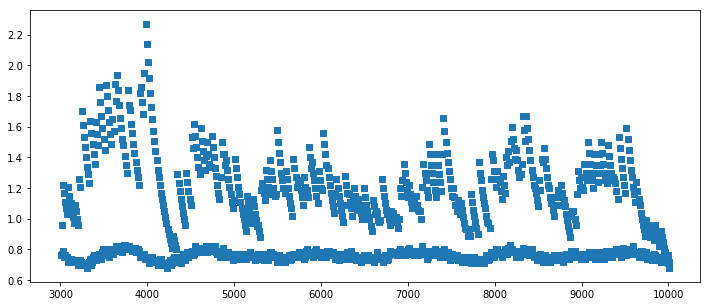

In [6]:
f, (ax1) = plt.subplots(1,1, figsize=(12,5))
ax1.scatter(x=cup_df['time'], y=cup_df['muscle_3'], marker="s")


'''
ax2.scatter(x=cup_df['time'], y=cup_df['muscle_2'])
ax3.scatter(x=cup_df['time'], y=cup_df['muscle_3'])
ax4.scatter(x=cup_df['time'], y=cup_df['muscle_4'])
ax5.scatter(x=cup_df['time'], y=cup_df['muscle_5'])
'''
plt.show()

In [7]:
x = cup_df.drop('mode', axis=1)
y = cup_df['mode']


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
x_train.shape


(888, 6)

In [10]:
test=cup_df[:5].drop('mode',axis=1)
#print(test)
y_pred = clf.predict(test)
print(y_pred)




['active' 'active' 'active' 'active' 'active']


In [47]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[104   0]
 [  0 119]]
              precision    recall  f1-score   support

      active       1.00      1.00      1.00       104
        rest       1.00      1.00      1.00       119

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [13]:
force3 = pd.read_excel(r"/home/camera/Documents/smart_pros/hand_jupyter_notebook/hold_a_cup.xlsx", sheet_name="force3")
force3.head()

,Start recording for holding movement of holding a cup posture for 7 seconds...,Time (s),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,3001 miliseconds,3001,2.01,0.27,0.25,1.36,0.51
1,3013 miliseconds,3013,1.91,0.26,0.24,1.30,0.48
2,3026 miliseconds,3026,1.82,0.25,0.27,1.26,0.46
3,3039 miliseconds,3039,1.74,0.24,0.26,1.21,0.45
4,3051 miliseconds,3051,1.66,0.23,0.25,1.16,0.43


In [14]:
force3.columns = ['raw_time', 'time', 'muscle_1', 'muscle_2', 'muscle_3', 'muscle_4', 'muscle_5']
force3 = force3.drop('raw_time',1)
force3 = force3.drop(0)

In [15]:
force3.head()

,time,muscle_1,muscle_2,muscle_3,muscle_4,muscle_5
1,3013,1.91,0.26,0.24,1.30,0.48
2,3026,1.82,0.25,0.27,1.26,0.46
3,3039,1.74,0.24,0.26,1.21,0.45
4,3051,1.66,0.23,0.25,1.16,0.43
5,3064,1.58,0.22,0.24,1.11,0.42


In [18]:
force3_sample = force3[:1]
y_pred = clf.predict(force3_sample)
print(y_pred)

['active']


In [19]:
force3_sample.shape

(1, 6)

In [ ]:
filename = 'EMG_svm_pickle.pkl'
EMG_svm_pickle = open(filename, "wb")
pickle.dump(clf, EMG_svm_pickle)
EMG_svm_pickle.close()